# Assignment-11 

## Regression

### Name- NITESH KUMAR Batch-4

# Q1. What is Regression? Explain With Example.

### Answer:-

Regression is a statistical technique used in data analysis and machine learning to model the relationship between a dependent variable (also known as the target or outcome variable) and one or more independent variables (also known as predictors or features). The primary goal of regression analysis is to understand and quantify the relationship between these variables so that we can make predictions or infer patterns from the data.


#### For Example:-

### Predicting Height of Students

In [ ]:
# Let's say that we have to predict the height by using the weight data

## 1. Data collection:

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("height-weight.csv")

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [5]:
# In the data:
# Independent feature is weight and dependent feature is Height.

## 2. Data Analysis:

In [13]:
# Divide the dataset into independent and dependent features
X=df[["Weight"]]
y=df[["Height"]] # 2d array require for standardization

In [14]:
import matplotlib.pyplot as plt

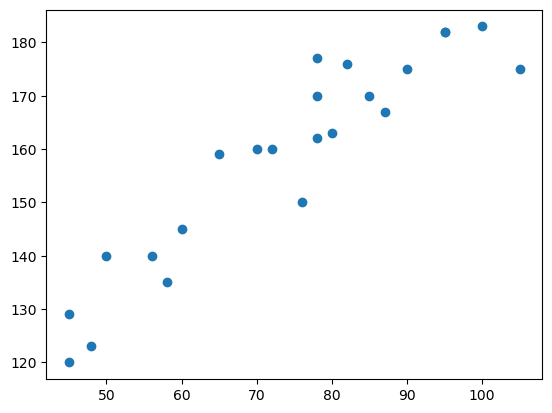

In [15]:
plt.scatter(X,y)
plt.show() # look like the relationship between X and y is linear relationship

In [16]:
# Now we will split the dataset into train and test
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape

((23, 1), (23, 1), (18, 1), (18, 1), (5, 1), (5, 1))

In [19]:
# standardization the dataset( Train independent data)
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [24]:
X_train_scaled=scaler.fit_transform(X_train)

In [25]:
X_test_scaled=scaler.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


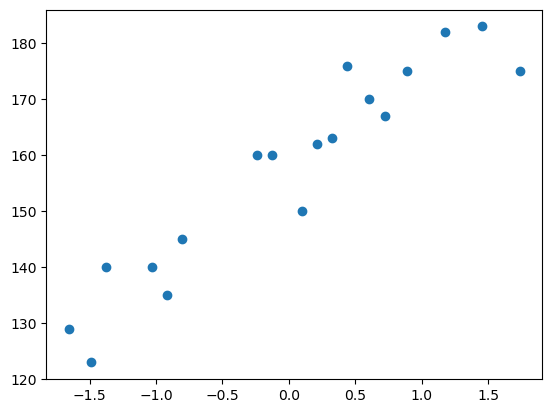

In [27]:
plt.scatter(X_train_scaled,y_train)
plt.show()

## 3. Regression modelling:

Because the relationship between the X and y is linear so we will use linear regression to build a predictive model

## 4. Model training

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor=LinearRegression()

In [30]:
# fit the train data
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
regressor.coef_

array([[17.03440872]])

In [32]:
regressor.intercept_

array([157.5])

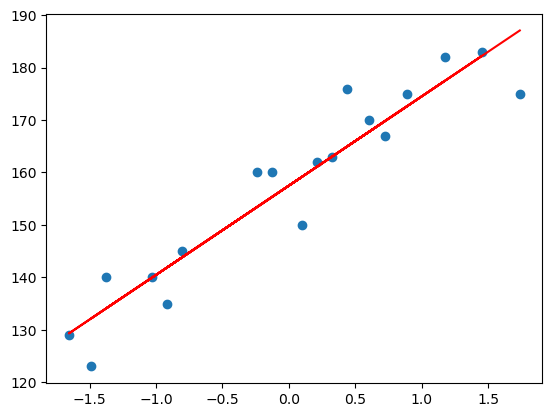

In [33]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,regressor.predict(X_train_scaled),"r") # best fit line

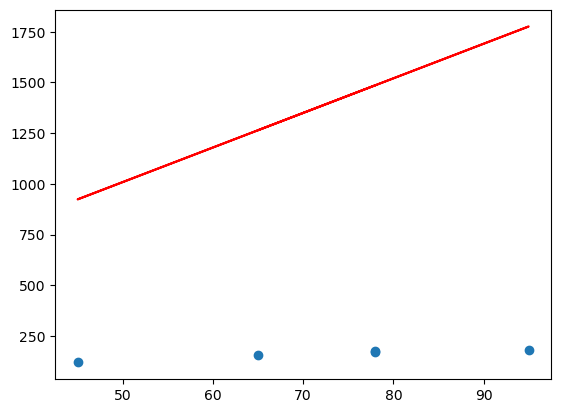

In [36]:
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled,regressor.predict(X_test_scaled),"r")

### 5. predict the data

In [37]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


In [38]:
y_test_predict=regressor.predict(X_test_scaled)

In [43]:
y_test.shape,y_test_predict.shape

((5, 1), (5, 1))

In [56]:
import pandas as pd
import numpy as np

In [58]:
y_test=y_test.flatten()

In [59]:
y_test_predict=y_test_predict.flatten()

In [60]:
y_test.shape,y_test_predict.shape

((5,), (5,))

In [61]:
data1=({"Actual":y_test,"predicted":y_test_predict})

In [62]:
pd.DataFrame(data=data1)

,Actual,predicted
0,177,1486.183880
1,170,1486.183880
2,120,924.048392
3,182,1775.768828
4,159,1264.736567


### 6. Evaluation

In [ ]:
# model should be lower MSE and higher R-squared

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [66]:
mse=mean_squared_error(y_test,y_test_predict)
mae=mean_absolute_error(y_test,y_test_predict)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_test_predict)
Adj_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("mse value is:",mse)
print("mae value is:",mae)
print("rmse value is:",rmse)
print("R square value is:",score)
print("Adjusted R square value is:",Adj_score)

mse value is: 1571109.7376966465
mae value is: 1225.7843095186977
rmse value is: 1253.4391639392184
R square value is: -3190.755521080462
Adjusted R square value is: -4254.6740281072825


# Q2. Give a Brief Note on Linear Regression. 

### Answer:-

Linear regression is one of the most fundamental and widely used statistical techniques for modeling the relationship between a dependent variable (also called the target or response variable) and one or more independent variables (predictors or features). It's a supervised learning algorithm that's often employed for tasks like prediction and understanding the relationships within data. 

### Key points:

1. Output should be continuos
2. There are two types:
    (a) Simple linear regression- one independent feature and 1 dependent feature
    
    (b) Multiple linear regression- Multiple independent feature and 1 dependent feature
3. Main aim to find out best fit line and for any new i/p feature o/p should be on the best fitline.
4. Error between the actual and predicted line should be minimal.


5. Interpretability:

Linear regression provides interpretable coefficients. The coefficients indicate the strength and direction of the relationship between each independent variable and the dependent variable. For example, if coefficient is positive, it means an increase in the independent variable x1 is associated with an increase in the dependent variable y.

6. Assumptions: 

Linear regression assumes several key assumptions including:

(a) linearity

(b) independence of errors

(c) homoscedasticity (constant variance of errors)

(d) normality of errors.

Violations of these assumptions can affect the validity of the model's predictions.

7. Evaluation(performance metrics):

Common metrics for evaluating the performance of a linear regression model include:

(a) Mean Squared Error (MSE)

(b) Mean absolute Error(MAE)

(c) Root Mean Squared Error(RMSE)

(d) R-squared (coefficient of determination)

(e) Adjusted R-Squred

which help assess how well the model fits the data.

# Q3. Take two Variables x, y with data of your own and Find R² for fitting the best line.

### Answer:-

In [69]:
import pandas as pd

In [70]:
df=pd.read_csv("insurance.csv")

In [71]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
X=df[["age"]] # independent feature
y=df[["charges"]] # dependent feature

In [75]:
X.head()

,age
0,19
1,18
2,28
3,33
4,32


In [76]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [82]:
X.shape,y.shape

((1338, 1), (1338, 1))

In [77]:
# split dataset into train-test
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 1), (268, 1), (1070, 1), (268, 1))

In [83]:
# train the model
from sklearn.linear_model import LinearRegression

In [84]:
regressor=LinearRegression()

In [85]:
# fit the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [87]:
# predict the test data
y_test_pred=regressor.predict(X_test)

In [88]:
from sklearn.metrics import r2_score

In [89]:
r2_score(y_test,y_test_pred)

0.12408973539501944

# Q4. Build a simple logistic regression model on the ‘customer_churn’ dataframe, where the the dependent variable is ‘Churn’ & the independent variable is ‘TechSupport’. Store the result in ‘log_mod_1’ 

a. Have a glance at the summary of the model built

b. Predict the result when the value of ‘TechSupport’ is ‘Yes’ 

c. Predict the result when the value of ‘TechSupport’ is ‘No’ 

d. Predict the result when the value of ‘TechSupport’ is ‘No internet service’. 

### Answer:-

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Customer churn.csv")

In [4]:
df

,customerID,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.columns

Index(['customerID', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   TechSupport       7043 non-null   object 
 2   StreamingTV       7043 non-null   object 
 3   StreamingMovies   7043 non-null   object 
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   PaymentMethod     7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7043 non-null   object 
 9   Churn             7043 non-null   object 
dtypes: float64(1), object(9)
memory usage: 550.4+ KB


In [ ]:
# We have require TechSupport and Churn for further analysis
# Both are the categorical data and need to convert in numerical. 

In [10]:
df["Churn"].unique() # we will do oneHot Encoding

array(['No', 'Yes'], dtype=object)

In [11]:
df[["Churn"]]=pd.get_dummies(df[["Churn"]],drop_first=True)


In [12]:
df["TechSupport"].unique() # we will do Label encoder

array(['No', 'Yes', 'No internet service'], dtype=object)

In [13]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lbl_encoder=LabelEncoder()

In [16]:
df["TechSupport"]=lbl_encoder.fit_transform(df["TechSupport"])

In [17]:
df["TechSupport"].value_counts()
# No-0
# Yes- 2
# No internet Service-1

0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64

In [18]:
df

,customerID,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,0,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [26]:
# define independent and dependent features
X=df[["TechSupport"]]
y=df[["Churn"]]

In [28]:
X

,TechSupport
0,0
1,0
2,0
3,2
4,0
...,...
7038,2
7039,0
7040,0
7041,0


In [29]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [30]:
X.shape,y.shape

((7043, 1), (7043, 1))

In [33]:
# split the data into train test
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
# Build model using LogisticRegression
from sklearn.linear_model import LogisticRegression

In [36]:
Log_mod_1=LogisticRegression()

In [37]:
Log_mod_1.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### (a) To obtain a summary of a logistic regression model built using scikit-learn, we need to use the statsmodels library. Scikit-learn itself does not provide a summary method for logistic regression models. Here's how you can obtain a summary using statsmodels

In [39]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [41]:
import statsmodels.api as sm

In [42]:
# Build Logistic Regression model
Log_mod_1=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 201.979608
         Iterations 6


In [44]:
print(Log_mod_1.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5633
Method:                           MLE   Df Model:                            0
Date:                Wed, 23 Aug 2023   Pseudo R-squ.:                     inf
Time:                        12:20:50   Log-Likelihood:            -1.1380e+06
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
TechSupport    -1.1472      0.036    -31.713      0.000      -1.218      -1.076


In [45]:
# Predict the result when the value of 'TechSupport' is 'Yes'
predict_yes=Log_mod_1.predict([[2]])

In [46]:
predict_yes

array([0.09159474])

In [47]:
# Predict the result when the value of 'TechSupport' is 'no'
predict_no=Log_mod_1.predict([[0]])

In [48]:
predict_no

array([0.5])

In [49]:
# Predict the result when the value of 'TechSupport' is 'no_internet_service'
predict_No_internet_Service=Log_mod_1.predict([[1]])

In [50]:
predict_No_internet_Service

array([0.2410085])

# Q5. Build a simple logistic regression model on the ‘customer_churn’ dataframe, where the the dependent variable is ‘Dependents’ & the independent variable is ‘tenure’. Store the result in ‘log_mod_2’ 

a. Have a glance at the summary of the model built 

b. Predict the result when the value of ‘tenure’ is 10 

c. Predict the result when the value of ‘tenure’ is 50 

d. Predict the result when the value of ‘tenure’ is 70

### Answer:-

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv("Churn data_Qe5.csv")

In [12]:
df.head(2)

,customerID,gender,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,1,29.85,29.85,No
1,5575-GNVDE,Male,No,No,34,56.95,1889.5,No


In [13]:
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df["Dependents"]=pd.get_dummies(df["Dependents"],drop_first=True)

In [16]:
df

,customerID,gender,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,0,1,29.85,29.85,No
1,5575-GNVDE,Male,No,0,34,56.95,1889.5,No
2,3668-QPYBK,Male,No,0,2,53.85,108.15,Yes
3,7795-CFOCW,Male,No,0,45,42.30,1840.75,No
4,9237-HQITU,Female,No,0,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,1,24,84.80,1990.5,No
7039,2234-XADUH,Female,Yes,1,72,103.20,7362.9,No
7040,4801-JZAZL,Female,Yes,1,11,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,0,4,74.40,306.6,Yes


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

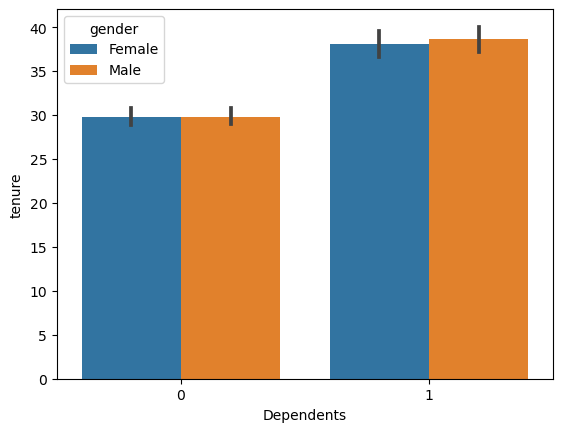

In [22]:
sns.barplot(data=df,x="Dependents",y="tenure",hue="gender")
plt.show

In [23]:
# define independent and dependent feature
X= df[["tenure"]]
y=df[["Dependents"]]

In [34]:
X.shape,y.shape

((7043, 1), (7043, 1))

In [ ]:
# Build Logistic regression model

In [38]:
import statsmodels.api as sm

In [39]:
Log_mod_2=sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 63.289898
         Iterations 4


## (a)

In [41]:
print(Log_mod_2.summary())

                           Logit Regression Results                           
Dep. Variable:             Dependents   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7042
Method:                           MLE   Df Model:                            0
Date:                Wed, 23 Aug 2023   Pseudo R-squ.:                     inf
Time:                        14:22:37   Log-Likelihood:            -4.4575e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tenure        -0.0118      0.001    -18.986      0.000      -0.013      -0.011


## (b)

In [42]:
# Predict the result when the value of 'tenure' is '10'
predict_tenure_10=Log_mod_2.predict([[10]])

In [43]:
predict_tenure_10

array([0.47044862])

### Insights
when the predictor variable has a value of 10, there's a 47% chance that the event we are interested in will happen.

### (c)

In [45]:
# Predict the result when the value of 'tenure' is '50'
predict_tenure_50=Log_mod_2.predict([[50]])

In [46]:
predict_tenure_50

array([0.35624096])

### Insights
when the predictor variable has a value of 50, there's a 35.6% chance that the event we are interested in will happen.

### (d)

In [47]:
# Predict the result when the value of 'tenure' is '70'
predict_tenure_70=Log_mod_2.predict([[70]])

In [48]:
predict_tenure_70

array([0.30398264])

### Insights
when the predictor variable has a value of 70, there's a 30.3% chance that the event we are interested in will happen.